In [7]:
#import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree

#Load dataset
df = pd.read_csv('Loan_Dataset.csv',sep= ',', header= 0)
df.head(10)

,1,2,3,4,sum,Unnamed: 5
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
5,406,10187,166,3068,13827,yes
6,461,10252,172,3062,13947,yes
7,158,10192,144,3469,13963,yes
8,136,10376,230,3223,13965,yes
9,194,10092,626,3083,13995,yes


In [8]:
print("Shape of the dataset", df.shape)

Shape of the dataset (1000, 6)


In [11]:
#naming each columns
df.columns = ['Initial payment', 'Last payment', 'Credit Score','House Number', 'Sum', 'Result']
df

,Initial payment,Last payment,Credit Score,House Number,Sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
...,...,...,...,...,...,...
995,413,14914,523,4683,20533,No
996,359,14423,927,4838,20547,No
997,316,14872,613,4760,20561,No
998,305,14926,897,4572,20700,No


In [12]:
#Information of the dataset
print("Information of the dataset:")
df.info()

Information of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Initial payment  1000 non-null   int64 
 1   Last payment     1000 non-null   int64 
 2   Credit Score     1000 non-null   int64 
 3   House Number     1000 non-null   int64 
 4   Sum              1000 non-null   int64 
 5   Result           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


In [19]:
#Seperating target value
X = df.loc[:, ['Initial payment', 'Last payment', 'Credit Score', 'House Number']] 
Y = df.loc[:, ['Result']]

In [20]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

In [21]:
#Function to train dataset
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=3, min_samples_leaf=5)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [22]:
#Predicting
y_pred = decision_tree.predict(X_test)
y_pred

array(['yes', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'yes', 'No', 'yes', 'yes', 'No', 'No', 'yes', 'No', 'No',
       'No', 'yes', 'yes', 'yes', 'yes', 'No', 'No', 'No', 'yes', 'No',
       'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'yes', 'No', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'No', 'yes',
       'yes', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'yes', 'No', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'No', 'yes', 'No', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'yes', 'No', 'yes', 'yes', 'yes',
       'yes', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'yes', 'yes', 'yes', 'yes', 'No', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'No', 'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No',
       'No', 'yes', 'yes', 'No', 'yes', 'yes', 'yes', 'No', 'ye

In [23]:
#print accuracy score of the predection
print("Acuracy Score: ", accuracy_score (y_test, y_pred))

Acuracy Score:  0.9366666666666666


In [24]:
#Decesion tree 
text_representation = tree.export_text(decision_tree)
print(text_representation)

|--- feature_1 <= 12545.00
|   |--- feature_1 <= 11566.50
|   |   |--- feature_0 <= 485.50
|   |   |   |--- class: yes
|   |   |--- feature_0 >  485.50
|   |   |   |--- class: yes
|   |--- feature_1 >  11566.50
|   |   |--- feature_3 <= 4343.50
|   |   |   |--- class: yes
|   |   |--- feature_3 >  4343.50
|   |   |   |--- class: No
|--- feature_1 >  12545.00
|   |--- feature_1 <= 13235.50
|   |   |--- feature_3 <= 3588.50
|   |   |   |--- class: yes
|   |   |--- feature_3 >  3588.50
|   |   |   |--- class: No
|   |--- feature_1 >  13235.50
|   |   |--- feature_0 <= 128.50
|   |   |   |--- class: No
|   |   |--- feature_0 >  128.50
|   |   |   |--- class: No



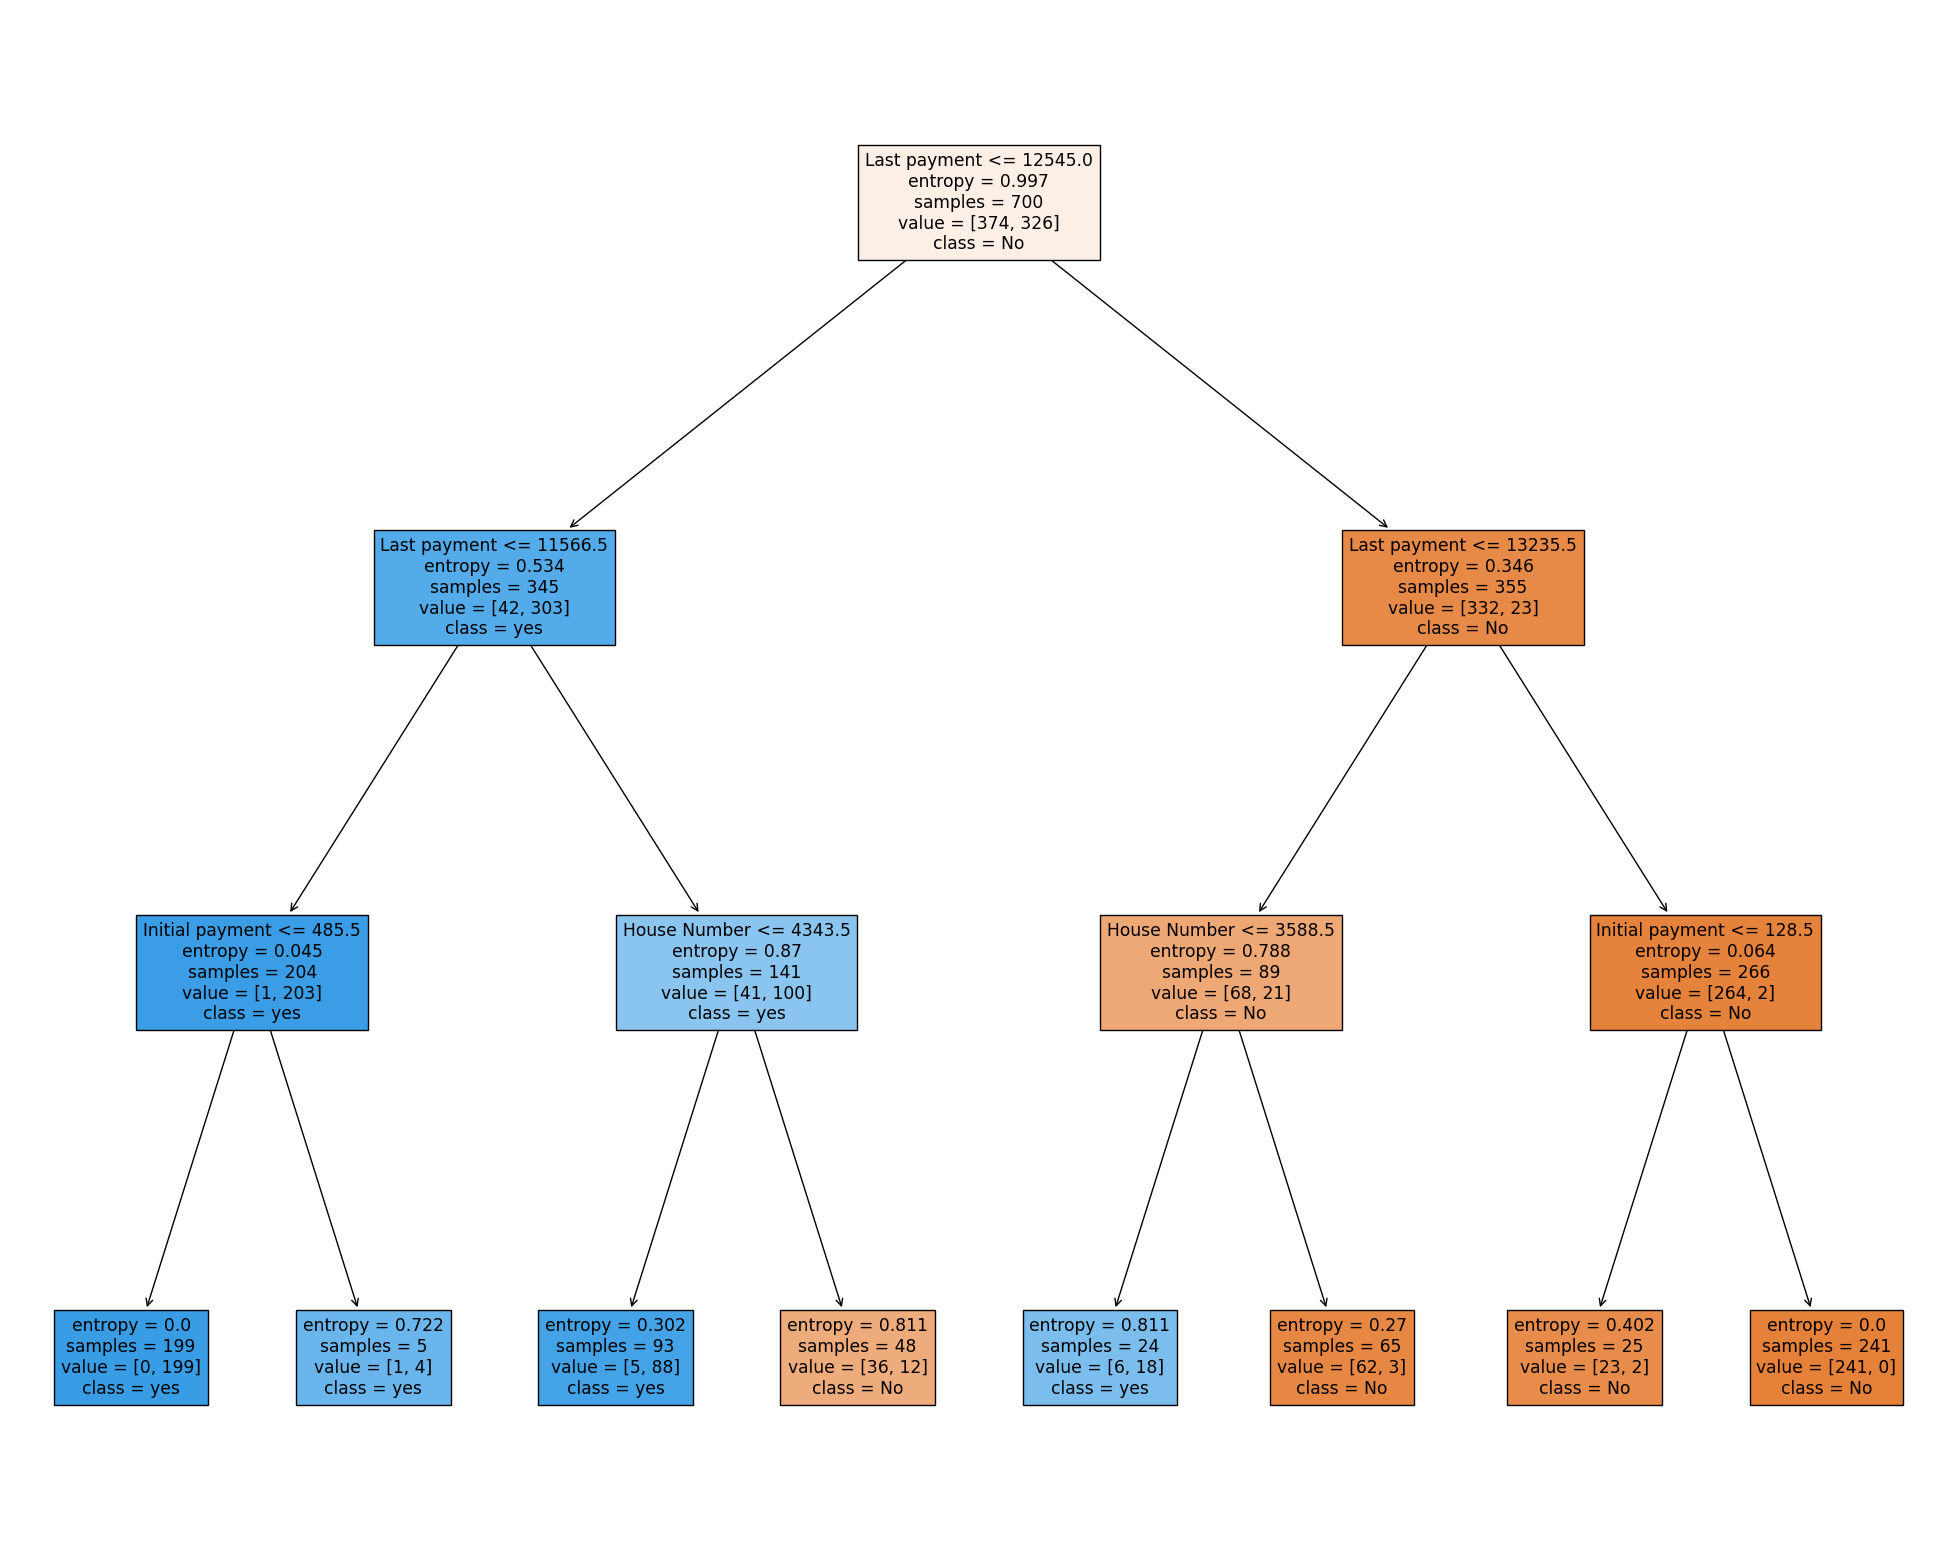

In [29]:
#plot decesion tree
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 20))
plot_tree(decision_tree, feature_names=X.columns, class_names=decision_tree.classes_, filled=True)
plt.show()